# Assignment 11


# 20135619 LeeKangJin

# Git Link : https://github.com/LeeKangJin/assignment

# Std = 0.9 & Lamda = 0.1


import a package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy import signal
from skimage import io, color
from skimage import exposure

# given code.

image read

In [2]:
# def fileReadNSetStd(std):
file_image	= 'small_cau.png' # chage the image to small

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.9 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

#     return im_color,im_gray,im,row,col,noise_std,noise,im_noise,im_recon,noise_recon,error

# filereadNsetStd()

# Make D_v, D_h

In [3]:
def MakeDmatrix(n,m):
    D_h = np.hstack((np.eye(n*m-n), np.zeros((n*m-n, n)))) - np.hstack((np.zeros((n*m-n, n)),np.eye(n*m-n)))
    B_v =  np.hstack((np.eye(n-1),np.zeros((n-1,1)))) -np.hstack((np.zeros((n-1,1)),np.eye(n-1)))
    D_v = np.kron(np.eye(m),B_v)
    return D_v, D_h

# Make A Matrix 

number of image is row. 

$$
A = \left[{\begin{array}{ccccc}
     I_{nm} \\
    \sqrt{\lambda}D_v  \\
    \sqrt{\lambda}D_h \end{array}} \right]
$$


In [4]:
def matrixA(lamda):
    D_v,D_h = MakeDmatrix(row,col)
    rootLamda = np.power(lamda,noise_std)
    tempA1 = np.eye(row*col)
    tempA2 = rootLamda*D_v
    tempA3 = rootLamda*D_h

    return np.vstack([tempA1,tempA2,tempA3])
    

# Make B

In [5]:
def matrixB(b):
    return np.vstack([b,np.zeros((2*row*col-row-col,1))])

# Tall Matrix Sudo Inverse 

$$ A_{sudo} = (A^{T}A)^{-1}A^{T} $$

 * A is not linear independent = can not use inverse.
 
 * So i use pinv.

In [6]:
def Asudo(A):
    A_transpose = A.T
    SudoA = np.matmul(A_transpose,A)
    SudoA = np.linalg.pinv(SudoA)
    SudoA = np.matmul(SudoA,A_transpose)
    return SudoA

# Set the diffrent lamda, std


# Solve least square

$$ x = A_{sudo}b $$

In [7]:
A = matrixA(0.1)
B = matrixB(im.flatten('F').reshape(-1,1))

SudoA = Asudo(A)
x = np.matmul(SudoA,B)

finalImage = x.reshape((row,col),order='F')
err = np.matmul(A,x)-B    



np.linalg.norm(ax-b)를 넣으면 error


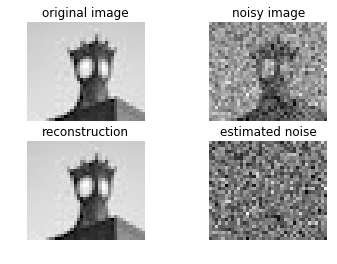

In [8]:
p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(finalImage, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

In [9]:
err =np.linalg.norm(err)
print(err)

2.809529354466551
